# Introduction
In this Notebook, we would perform different text classification techniques to solve the BBC new article categorization problem. We will also perform a vector space models to represent text data.
We will be using Python, Sci-kit-learn, Gensim and the Xgboost library for solving this problem.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from gensim import utils
import gensim.parsing.preprocessing as gsp

In [4]:
data = pd.read_csv('bbc-text.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## Data Exploration & Visualisation

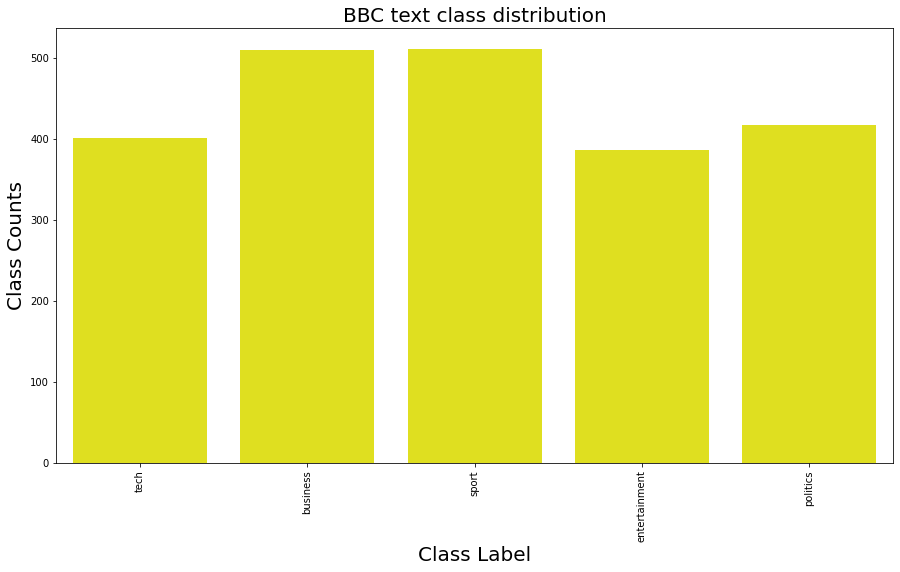

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x=data.category, color='Yellow')
plt.title('BBC text class distribution', fontsize=20)
plt.ylabel('Class Counts', fontsize=20)
plt.xlabel('Class Label', fontsize=20)
plt.xticks(rotation='vertical');

## Text Cleaning

In [25]:
filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s


In [26]:
data.iloc[4,1]

'ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m (£21m) in weekend ticket sales  according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one  national treasure  into third place. wesley snipes  blade: trinity was in second  taking $16.1m (£8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took $38.1m (£19.8m) on its opening weekend and $184m (£95.8m) in total. a remake of the 1960s film  starring frank sinatra and the rat pack 

In [27]:
clean_text(data.iloc[4,1])

'ocean raid box offic ocean crime caper sequel star georg cloonei brad pitt julia robert gone straight number box offic chart took weekend ticket sale accord studio estim sequel follow master crimin try pull major heist europ knock week number nation treasur place weslei snipe blade triniti second take round anim fabl polar express star tom hank festiv comedi christma krank ocean box offic triumph mark fourth biggest open decemb releas film lord ring trilogi sequel narrowli beat predecessor ocean took open weekend total remak film star frank sinatra rat pack ocean direct oscar win director steven soderbergh soderbergh return direct hit sequel reunit cloonei pitt robert matt damon andi garcia elliott gould catherin zeta jone join star cast fun good holidai movi said dan fellman presid distribut warner bro critic complimentari project lo angel time label dispirit vaniti project milder review new york time dub sequel unabashedli trivial'

In [28]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

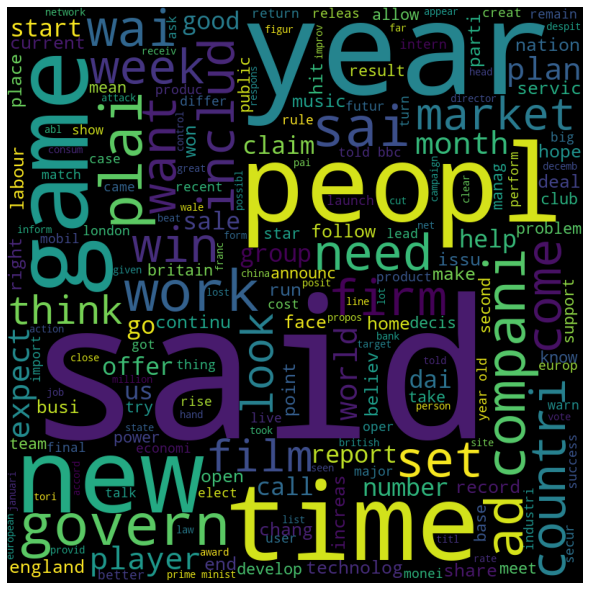

In [29]:
texts = ''
for index, item in data.iterrows():
    texts = texts + ' ' + clean_text(item['text'])
    
plot_word_cloud(texts)

In [30]:
def plot_word_cloud_for_category(data, category):
    text_df = data.loc[data['category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['text'])
    
    plot_word_cloud(texts)

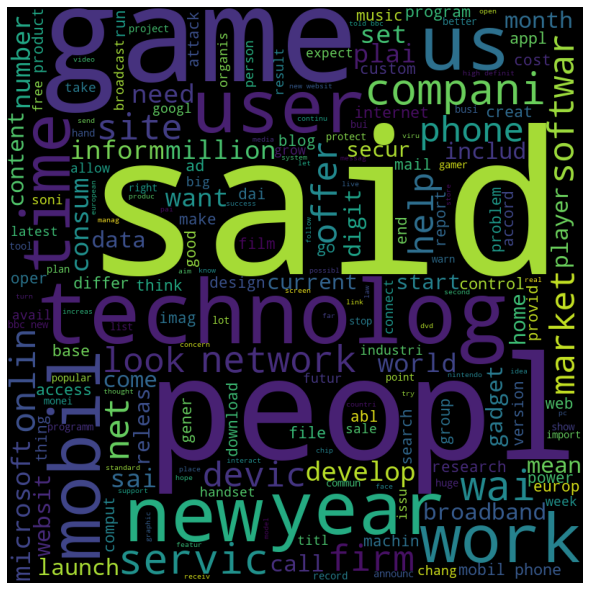

In [32]:
plot_word_cloud_for_category(data,'tech')

## Vector Space Modelling & Building the Pipeline
**Using Tf-Idf**

In [37]:
df_x = data['text']
df_y = data['category']

In [34]:
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [38]:
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df_x).transform(df_x)

In [40]:
print('dimensions:', tfidf_vectors.shape)

dimensions: (2225, 18755)


In [41]:
print(tfidf_vectors)

  (0, 18657)	0.026751783070208267
  (0, 18462)	0.012282569403139645
  (0, 18331)	0.06321612895581909
  (0, 18305)	0.1583605258104538
  (0, 18175)	0.03191861694040893
  (0, 18107)	0.07347900571034054
  (0, 18078)	0.0820082845034905
  (0, 18028)	0.08634135472606572
  (0, 17847)	0.024976845920106364
  (0, 17836)	0.03920692490243918
  (0, 17820)	0.0237112847547106
  (0, 17636)	0.10369692742506256
  (0, 17587)	0.058415007300576784
  (0, 17172)	0.42378247529420265
  (0, 17023)	0.04909762905009908
  (0, 16861)	0.024467110895914575
  (0, 16827)	0.012395674298416093
  (0, 16802)	0.04354600077310887
  (0, 16801)	0.1061221922410514
  (0, 16760)	0.019836834312179287
  (0, 16757)	0.02454881452504954
  (0, 16638)	0.108042004704681
  (0, 16626)	0.3048220054117621
  (0, 16529)	0.02112249983533661
  (0, 16357)	0.030876741901122738
  :	:
  (2224, 8119)	0.5554941760150036
  (2224, 8008)	0.10226374007302491
  (2224, 7456)	0.11194511747688254
  (2224, 7427)	0.0589324755687766
  (2224, 7373)	0.0462288710188

## Pipeline with Tf-Idf & LogisticRegression

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pl_log_reg_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100))])
scores = cross_val_score(pl_log_reg_tf_idf, df_x, df_y, cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [46]:
print('Accuracy for Tf-Idf & Logistic Regression: ', scores.mean())

Accuracy for Tf-Idf & Logistic Regression:  0.8966292134831461


## Pipeline with Tf-Idf & RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier


pl_random_forest_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                   ('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest_tf_idf, df_x, df_y, cv=5,scoring='accuracy')

In [48]:
print('Accuracy for Tf-Idf & RandomForest : ', scores.mean())

Accuracy for Tf-Idf & RandomForest :  0.941123595505618


## Pipeline with Tf-Idf & XGBoost

In [49]:
import xgboost as xgb

pl_xgb_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                         ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb_tf_idf, df_x, df_y, cv=5)

In [51]:
print('Accuracy for Tf-Idf & XGBoost Classifier : ', scores.mean())

Accuracy for Tf-Idf & XGBoost Classifier :  0.9334831460674158
